# Data Preprocessing 

Tha data has been collected and saved in an excel spreadsheet located in Google Drive.
This spreadsheet is made of three different sheets: 
* One for storing demographic data
* One for the respondents' selected choices 
* One for all the alternatives in that specific survey. 
<br>
The demographic sheet does not require any data manipulation becasue there are no missing values. All the data are in the same format due to the fact that answers were seleted through drop down menus. 
<br>
With respect to the second and third sheet we have to make some manipulations:
* The sheet containing the respondents' preferences is in the wide format:
    * One column for each answer (12 overall)
* The sheet containing all the alternatives in the surveys is instead in the long format:
    * One row for each option. 

<br>


The survey data has to be transformed in order to end up with a dataframe where data are organized in the following way: 
   * One column for the respondent id, that will be a number 
   * One column for each question, that will be a number from 1 to 12 (the number of questions in each survey).
   * One column that specifies the order of the options namely, upper, middle, lower 
   * One column for each attribute of the options.

In [1]:
# Import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

## Preprocessing on Demographic Data

In [2]:
demo_df = pd.read_excel('Clean_Data.xlsx', sheet_name = 'Demography', header = 0)

In [3]:
demo_df

,Age,Gender,Education,Job_Sector,Nation,Marital_Status
0,19-25,Female,Bachelor's,Other,Germany,Not Married
1,19-25,Male,Master's,Other,Italy,Not Married
2,19-25,Male,Bachelor's,Other,Italy,Not Married
3,19-25,Male,Master's,Agricolture,Italy,Not Married
4,25-35,Male,Master's,Services,Italy,Not Married
5,55-65,Male,PhD,Industry,Germany,Married
6,19-25,Male,Master's,Industry,Italy,Not Married
7,19-25,Male,Master's,Other,Italy,Not Married
8,19-25,Male,High School,Services,Italy,Not Married
9,19-25,Female,High School,Other,Italy,Not Married


In the above cell we can see the demographic data about our respondents. 
<br>
We can now play a little bit with them in order to get some pieces of information that could be then used for further analysis if needed. 

In [4]:
demo_info = {}

for col in demo_df.columns:
    demo_info[col] = (demo_df[col].unique().tolist())
    print(len(demo_df[col].unique().tolist()))
    

4
2
4
4
5
2


In [5]:
import pprint 

In [6]:
pprint.pprint(demo_info)

{'Age': ['19-25', '25-35', '55-65', '0-18'],
 'Education': ["Bachelor's", "Master's", 'PhD', 'High School'],
 'Gender': ['Female', 'Male'],
 'Job_Sector': ['Other', 'Agricolture', 'Services', 'Industry'],
 'Marital_Status': ['Not Married', 'Married'],
 'Nation': ['Germany', 'Italy', 'Spain', 'China', 'Turkey']}


As we can see from the above print we have: 
* three classes for age
* four classes for education 
* two classes for gender
* four classes for job sector
* two classes for marital status 
* five classes for nation

Now it is interesting to see the distribution of these classes.

Age
0-18      1
19-25    24
25-35     9
55-65     2
Name: Age, dtype: int64


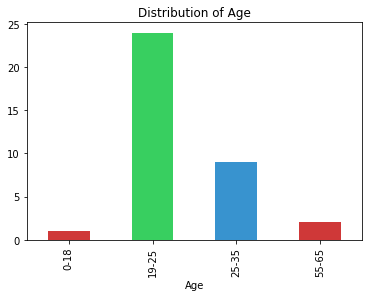

Gender
Female    13
Male      23
Name: Gender, dtype: int64


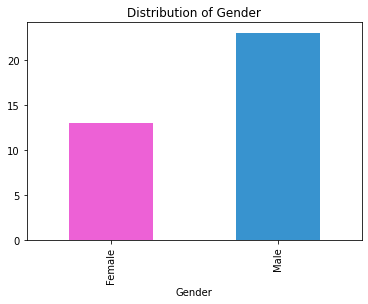

Education
Bachelor's     15
High School     5
Master's       15
PhD             1
Name: Education, dtype: int64


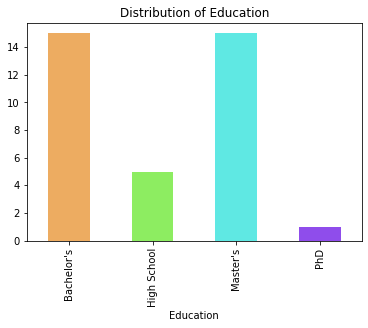

Job_Sector
Agricolture     2
Industry        3
Other          20
Services       11
Name: Job_Sector, dtype: int64


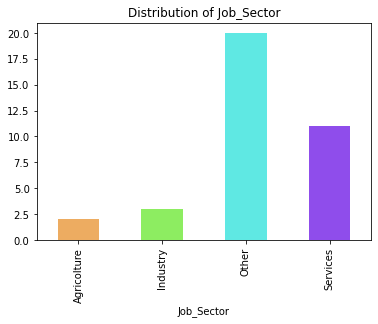

Nation
China       1
Germany     4
Italy      28
Spain       2
Turkey      1
Name: Nation, dtype: int64


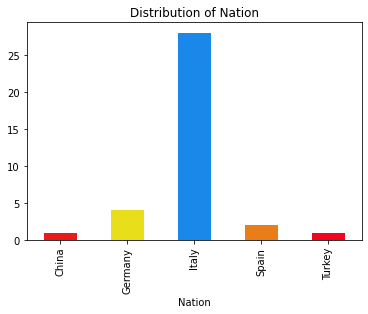

Marital_Status
Married         3
Not Married    33
Name: Marital_Status, dtype: int64


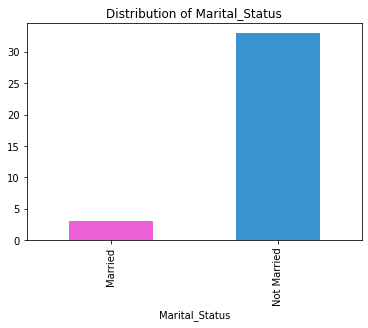

In [7]:
colori = None
for col in demo_df :
    if col == 'Age':
        colori = ['#cf3838','#38cf60','#3893cf']
        
    if col == 'Gender' or col == 'Marital_Status':
        colori = ['#ed61d6','#3893cf']
        
    if col == 'Education' or col == 'Job_Sector':
        colori = ['#edac61', '#8ded61', '#5fe8e3', '#8f4deb']
 
    if col == 'Nation':
        colori = ['#e81a1a', '#e8de1a', '#1a88e8', '#e87d1a', '#f2051d', ]
    
    print(demo_df.groupby(col)[col].count())
    demo_df.groupby(col)[col].count().plot.bar(color = colori)
    plt.title('Distribution of {}'.format(col))
    plt.show()
    #print(demo_df.groupby(col)[col].count())

From this first representation of the data we notice that :
* respondents tend to be mainly between 19 and 25 years old, 
* respondents are prevalently males,
* respondents are mainly italians,
* respondents have a quite high degree of education (Bachelor's or Master's),
* respondents are typically not married.

This preliminary analysis on the respondents is just intended to give a basics information. 
Later the demographic data will be further nalyzed together with the respective answers in order to understand if it is possible to find some pattern in the data. 
<br>
Before moving on column will be added to `demo_df` and it will represent the `resp.id`.

In [8]:
demo_df['resp.id'] = list(range(1,len(demo_df)+1))

In [9]:
demo_df

,Age,Gender,Education,Job_Sector,Nation,Marital_Status,resp.id
0,19-25,Female,Bachelor's,Other,Germany,Not Married,1
1,19-25,Male,Master's,Other,Italy,Not Married,2
2,19-25,Male,Bachelor's,Other,Italy,Not Married,3
3,19-25,Male,Master's,Agricolture,Italy,Not Married,4
4,25-35,Male,Master's,Services,Italy,Not Married,5
5,55-65,Male,PhD,Industry,Germany,Married,6
6,19-25,Male,Master's,Industry,Italy,Not Married,7
7,19-25,Male,Master's,Other,Italy,Not Married,8
8,19-25,Male,High School,Services,Italy,Not Married,9
9,19-25,Female,High School,Other,Italy,Not Married,10


## Preprocessin on Survey's answers

In [10]:
choice_df = pd.read_excel('Clean_Data.xlsx', sheet_name = 'Choices')

In [11]:
full_df = pd.read_excel('Clean_Data.xlsx', sheet_name = 'Full',header = None)

In [12]:
choice_df

,Choice1,Choice2,Choice3,Choice4,Choice5,Choice6,Choice7,Choice8,Choice9,Choice10,Choice11,Choice12
0,Platform Type: Web App | Amount of Deposit: mi...,Platform Type: Desktop App | Amount of Deposit...,Platform Type: Mobile App | Amount of Deposit:...,Platform Type: Mobile App | Amount of Deposit:...,Platform Type: Desktop App | Amount of Deposit...,Platform Type: Mobile App | Amount of Deposit:...,Platform Type: Web App | Amount of Deposit: mi...,Platform Type: Mobile App | Amount of Deposit:...,Platform Type: Mobile App | Amount of Deposit:...,Platform Type: Desktop App | Amount of Deposit...,Platform Type: Desktop App | Amount of Deposit...,Platform Type: Mobile App | Amount of Deposit:...
1,Platform Type: Mobile App | Amount of Deposit:...,Platform Type: Mobile App | Amount of Deposit:...,Platform Type: Desktop App | Amount of Deposit...,Platform Type: Mobile App | Amount of Deposit:...,Platform Type: Desktop App | Amount of Deposit...,Platform Type: Desktop App | Amount of Deposit...,Platform Type: Mobile App | Amount of Deposit:...,Platform Type: Mobile App | Amount of Deposit:...,Platform Type: Web App | Amount of Deposit: mi...,Platform Type: Mobile App | Amount of Deposit:...,Platform Type: Mobile App | Amount of Deposit:...,Platform Type: Mobile App | Amount of Deposit:...
2,Platform Type: Desktop App | Amount of Deposit...,Platform Type: Mobile App | Amount of Deposit:...,Platform Type: Desktop App | Amount of Deposit...,Platform Type: Desktop App | Amount of Deposit...,Platform Type: Mobile App | Amount of Deposit:...,Platform Type: Web App | Amount of Deposit: mi...,Platform Type: Desktop App | Amount of Deposit...,Platform Type: Mobile App | Amount of Deposit:...,Platform Type: Web App | Amount of Deposit: mi...,Platform Type: Desktop App | Amount of Deposit...,Platform Type: Web App | Amount of Deposit: mi...,Platform Type: Desktop App | Amount of Deposit...
3,Platform Type: Mobile App | Amount of Deposit:...,Platform Type: Desktop App | Amount of Deposit...,Platform Type: Web App | Amount of Deposit: mi...,Platform Type: Mobile App | Amount of Deposit:...,Platform Type: Web App | Amount of Deposit: mi...,Platform Type: Web App | Amount of Deposit: mi...,Platform Type: Mobile App | Amount of Deposit:...,Platform Type: Web App | Amount of Deposit: mi...,Platform Type: Desktop App | Amount of Deposit...,Platform Type: Mobile App | Amount of Deposit:...,Platform Type: Web App | Amount of Deposit: mi...,Platform Type: Mobile App | Amount of Deposit:...
4,Platform Type: Mobile App | Amount of Deposit:...,Platform Type: Web App | Amount of Deposit: mi...,Platform Type: Mobile App | Amount of Deposit:...,Platform Type: Mobile App | Amount of Deposit:...,Platform Type: Desktop App | Amount of Deposit...,Platform Type: Desktop App | Amount of Deposit...,Platform Type: Desktop App | Amount of Deposit...,Platform Type: Web App | Amount of Deposit: mi...,Platform Type: Mobile App | Amount of Deposit:...,Platform Type: Web App | Amount of Deposit: mi...,Platform Type: Web App | Amount of Deposit: mi...,Platform Type: Web App | Amount of Deposit: mi...
5,Platform Type: Web App | Amount of Deposit: mi...,Platform Type: Web App | Amount of Deposit: mi...,Platform Type: Mobile App | Amount of Deposit:...,Platform Type: Mobile App | Amount of Deposit:...,Platform Type: Web App | Amount of Deposit: mi...,Platform Type: Desktop App | Amount of Deposit...,Platform Type: Mobile App | Amount of Deposit:...,Platform Type: Web App | Amount of Deposit: mi...,Platform Type: Mobile App | Amount of Deposit:...,Platform Type: Web App | Amount of Deposit: mi...,Platform Type: Web App | Amount of Deposit: mi...,Platform Type: Web App | Amount of Deposit: mi...
6,Platform Type: Mobile App | Amount of Deposit:...,Platform Type: Web App | Amount of Deposit: mi...,Platform Type: Desktop App | Amount of Deposit...,Platform Type: Web App | Amount of Deposit: mi...,Platform Type: Mobile App | Amount of Deposit:...,Platform Type: Mobile App | Amount o

In [13]:
choice_df.iloc[0][0]

'Platform Type: Web App | Amount of Deposit: min 10€ max 10000€ | Fees on buy & sell orders: 0.025% | Financial Instruments: ETFs | Leverage: YES | Social/Copy Trading YES'

As we can see from the above representation, the dataset cotaining thhe answers is represented in the wide format. Each respondent is associated to a row and each answer is associated to a column. 

In [14]:
full_df.rename(columns = {0 : 'Options'}, inplace = True)

In [15]:
full_df

,Options
0,Platform Type: Web App | Amount of Deposit: mi...
1,Platform Type: Desktop App | Amount of Deposit...
2,Platform Type: Web App | Amount of Deposit: mi...
3,Platform Type: Desktop App | Amount of Deposit...
4,Platform Type: Desktop App | Amount of Deposit...
...,...
1291,Platform Type: Web App | Amount of Deposit: mi...
1292,Platform Type: Mobile App | Amount of Deposit:...
1293,Platform Type: Web App | Amount of Deposit: mi...
1294,Platform Type: Desktop App | Amount of Deposit...


On the other hand, the datasets regarding the whole set of options presented in the different versions of the survey is in the long format: each rows represent an alternative. 

Thanks to the knowledge of the survey's structure it is possible to manipulate the data in order to make them easier to use later. 
<br>
More precisely, what we want to do is creating a new dataframe where we have the `resp.id` a column that shows options with a simple one hot encoding (0 = not choosen; 1 = choosen) and a column for each attirbute. 
<br>
Hence, in the following lines of code we want to create the data frame on which we will conduct our analysis on R.

In [16]:
# Create the list containing the respondents id
resp_id_list = []
for i in range(1,len(demo_df)+1):
    resp_id_list.extend([[i]*36][0])

In [17]:
# Create the list containing the respondents id
list_questions = []
for j in range(1,len(demo_df)+1):
    for jj in range(1,13):
         list_questions.extend([jj]*3)

In [18]:
list_position = []
for j in range(len(full_df)//3):
    for el in ['top', 'middle', 'low']:
         list_position.append(el)

In [19]:
gender_list = demo_df.Gender.tolist()
gen =  []
for el in gender_list:
    gen.extend([el]*36)

In [20]:
# Create a list with all the observations
list_options = full_df['Options'].tolist()

In [21]:
# Create the empty dataframe
final_df = pd.DataFrame({
    'Platform' :[],
    'Deposit': [],
    'Fees': [],
    'Financial_Instrument': [],
    'Leverage':[],
    'Social_Trading':[]
})

rows = []
for el in list_options:
    # Cleaning the data
    list_choices = (el.split('|'))

    for sub_el in list_choices:
        # Cleaning the data
        sub_el = sub_el.strip(' ')
        if sub_el.startswith('Platform Type:'):
            sub_el = sub_el.lstrip('Platform Type:')
        if sub_el.startswith('Amount of Deposit:'): 
            sub_el = sub_el.lstrip('Amount of Deposit:')
        if sub_el.startswith('Fees on buy & sell orders:'):
            sub_el = sub_el.lstrip('Fees on buy & sell orders:')
        if sub_el.startswith('Financial Instruments:'):
            sub_el = sub_el.lstrip('Financial Instruments:')
        if sub_el.startswith('Leverage:'):
            sub_el = sub_el.lstrip('Leverage:')
        if sub_el.startswith('Social/Copy Trading'):
            sub_el = sub_el.lstrip('Social/Copy Trading')
        rows.append(sub_el)
    # Populating the DataFrame 
    df2 = pd.DataFrame({
    'Platform' :[rows[0]],
    'Deposit': [rows[1]],
    'Fees': [rows[2]],
    'Financial_Instrument': [rows[3]],
    'Leverage':[rows[4]],
    'Social_Trading':[rows[5]]})
    
    
    final_df = final_df.append(df2)
    rows = []

In [22]:
# Adding the column with the resp id 
final_df['resp.id'] = resp_id_list

In [23]:
# Adding the column with the question number
final_df['ques'] = list_questions

In [24]:
# Adding the column with the postion of the question 
final_df['position'] = list_position

In [25]:
final_df['Gender'] = gen 

In [26]:
# Let's have a look to the DataFrame
final_df

,Platform,Deposit,Fees,Financial_Instrument,Leverage,Social_Trading,resp.id,ques,position,Gender
0,Web App,0€ max 1000€,0.015%,Crypto,NO,YES,1,1,top,Female
0,Desktop App,0€ max 1000€,0%,Crypto,YES,NO,1,1,middle,Female
0,Web App,10€ max 10000€,0.025%,ETFs,YES,YES,1,1,low,Female
0,Desktop App,100€ max infinte,0.025%,Crypto,YES,NO,1,2,top,Female
0,Desktop App,10€ max 10000€,0%,Stocks,YES,YES,1,2,middle,Female
...,...,...,...,...,...,...,...,...,...,...
0,Web App,100€ max infinte,0.025%,Crypto,NO,NO,36,11,middle,Male
0,Mobile App,0€ max 1000€,0%,Commodities,YES,NO,36,11,low,Male
0,Web App,10€ max 10000€,0%,Stocks,NO,YES,36,12,top,Male
0,Desktop App,10€ max 10000€,0%,Crypto,YES,YES,36,12,middle,Male


In [27]:
choice_df.iloc[0]

Choice1     Platform Type: Web App | Amount of Deposit: mi...
Choice2     Platform Type: Desktop App | Amount of Deposit...
Choice3     Platform Type: Mobile App | Amount of Deposit:...
Choice4     Platform Type: Mobile App | Amount of Deposit:...
Choice5     Platform Type: Desktop App | Amount of Deposit...
Choice6     Platform Type: Mobile App | Amount of Deposit:...
Choice7     Platform Type: Web App | Amount of Deposit: mi...
Choice8     Platform Type: Mobile App | Amount of Deposit:...
Choice9     Platform Type: Mobile App | Amount of Deposit:...
Choice10    Platform Type: Desktop App | Amount of Deposit...
Choice11    Platform Type: Desktop App | Amount of Deposit...
Choice12    Platform Type: Mobile App | Amount of Deposit:...
Name: 0, dtype: object

In [28]:
# Adding label if an options has been chosen (1) or not (0)
labels = []
idx_i = 0
idx_d = 3
for row in range(len(demo_df)+1):
    for col in range(12):
        check_opts = list_options[idx_i : idx_d]
        for el in check_opts:
            if el == choice_df.iloc[row][col]:
                labels.append(1)
            else: 
                labels.append(0)
        
        idx_i = idx_d
        idx_d += 3
      

In [29]:
final_df['choice'] = labels 

Due to an error duering the data collection, the spreadsheet stopped to collect data at a certain point and this seems to have negatively affected the collection of all options. 
For this reason, in order to make the analysis more reliable, it is necessary to drop these observations. 

In [30]:
idx_i = 0
idx_f = 3
missing = []
while idx_f <= len(labels):
    if 1 not in labels[idx_i:idx_f]:
        missing.append((idx_i,idx_f))
    idx_i = idx_f
    idx_f +=3 

In [31]:
missing

[(432, 435),
 (435, 438),
 (438, 441),
 (441, 444),
 (444, 447),
 (447, 450),
 (450, 453),
 (453, 456),
 (456, 459),
 (459, 462),
 (462, 465),
 (465, 468),
 (468, 471),
 (471, 474),
 (474, 477),
 (477, 480),
 (480, 483),
 (483, 486),
 (486, 489),
 (489, 492),
 (492, 495),
 (495, 498),
 (498, 501),
 (501, 504),
 (504, 507),
 (507, 510),
 (510, 513),
 (513, 516),
 (516, 519),
 (519, 522),
 (522, 525),
 (525, 528),
 (528, 531),
 (531, 534),
 (534, 537),
 (537, 540),
 (540, 543),
 (543, 546),
 (546, 549),
 (549, 552),
 (552, 555),
 (555, 558),
 (558, 561),
 (561, 564),
 (564, 567),
 (567, 570),
 (570, 573),
 (573, 576),
 (579, 582),
 (582, 585),
 (585, 588),
 (588, 591),
 (591, 594),
 (594, 597),
 (597, 600),
 (600, 603),
 (603, 606),
 (606, 609),
 (609, 612),
 (612, 615),
 (615, 618),
 (618, 621),
 (621, 624),
 (624, 627),
 (627, 630),
 (630, 633),
 (633, 636),
 (636, 639),
 (639, 642),
 (642, 645),
 (645, 648),
 (648, 651),
 (651, 654),
 (654, 657),
 (657, 660),
 (660, 663),
 (663, 666),

In [32]:
beg = missing[0][0]
end = missing[-1][-1]

In [33]:
final_df.reset_index(inplace = True)
final_df.drop(columns = ['index'],inplace = True)

In [34]:
final_df

,Platform,Deposit,Fees,Financial_Instrument,Leverage,Social_Trading,resp.id,ques,position,Gender,choice
0,Web App,0€ max 1000€,0.015%,Crypto,NO,YES,1,1,top,Female,0
1,Desktop App,0€ max 1000€,0%,Crypto,YES,NO,1,1,middle,Female,0
2,Web App,10€ max 10000€,0.025%,ETFs,YES,YES,1,1,low,Female,1
3,Desktop App,100€ max infinte,0.025%,Crypto,YES,NO,1,2,top,Female,0
4,Desktop App,10€ max 10000€,0%,Stocks,YES,YES,1,2,middle,Female,1
...,...,...,...,...,...,...,...,...,...,...,...
1291,Web App,100€ max infinte,0.025%,Crypto,NO,NO,36,11,middle,Male,0
1292,Mobile App,0€ max 1000€,0%,Commodities,YES,NO,36,11,low,Male,0
1293,Web App,10€ max 10000€,0%,Stocks,NO,YES,36,12,top,Male,0
1294,Desktop App,10€ max 10000€,0%,Crypto,YES,YES,36,12,middle,Male,1


In [35]:
final_df.iloc[end]

Platform                 Desktop App
Deposit                 0€ max 1000€
Fees                              0%
Financial_Instrument     Commodities
Leverage                          NO
Social_Trading                   YES
resp.id                           21
ques                               1
position                         top
Gender                          Male
choice                             0
Name: 720, dtype: object

In [36]:
for ind_ in range(beg, end+1):
    final_df.drop(index = ind_, inplace = True)

In [37]:
final_df

,Platform,Deposit,Fees,Financial_Instrument,Leverage,Social_Trading,resp.id,ques,position,Gender,choice
0,Web App,0€ max 1000€,0.015%,Crypto,NO,YES,1,1,top,Female,0
1,Desktop App,0€ max 1000€,0%,Crypto,YES,NO,1,1,middle,Female,0
2,Web App,10€ max 10000€,0.025%,ETFs,YES,YES,1,1,low,Female,1
3,Desktop App,100€ max infinte,0.025%,Crypto,YES,NO,1,2,top,Female,0
4,Desktop App,10€ max 10000€,0%,Stocks,YES,YES,1,2,middle,Female,1
...,...,...,...,...,...,...,...,...,...,...,...
1291,Web App,100€ max infinte,0.025%,Crypto,NO,NO,36,11,middle,Male,0
1292,Mobile App,0€ max 1000€,0%,Commodities,YES,NO,36,11,low,Male,0
1293,Web App,10€ max 10000€,0%,Stocks,NO,YES,36,12,top,Male,0
1294,Desktop App,10€ max 10000€,0%,Crypto,YES,YES,36,12,middle,Male,1


In [38]:
#Checking if there are duplicates 
final_df.duplicated().sum()

0

In [39]:
# Reordering the columns 
final_df = final_df[['resp.id', 'ques', 'position', 'Platform', 'Deposit', 'Fees', 'Financial_Instrument', 'Leverage',
       'Social_Trading','Gender','choice',]]

Now the data are ready to be analyzed. 
Let's save them. 

In [40]:
final_df

,resp.id,ques,position,Platform,Deposit,Fees,Financial_Instrument,Leverage,Social_Trading,Gender,choice
0,1,1,top,Web App,0€ max 1000€,0.015%,Crypto,NO,YES,Female,0
1,1,1,middle,Desktop App,0€ max 1000€,0%,Crypto,YES,NO,Female,0
2,1,1,low,Web App,10€ max 10000€,0.025%,ETFs,YES,YES,Female,1
3,1,2,top,Desktop App,100€ max infinte,0.025%,Crypto,YES,NO,Female,0
4,1,2,middle,Desktop App,10€ max 10000€,0%,Stocks,YES,YES,Female,1
...,...,...,...,...,...,...,...,...,...,...,...
1291,36,11,middle,Web App,100€ max infinte,0.025%,Crypto,NO,NO,Male,0
1292,36,11,low,Mobile App,0€ max 1000€,0%,Commodities,YES,NO,Male,0
1293,36,12,top,Web App,10€ max 10000€,0%,Stocks,NO,YES,Male,0
1294,36,12,middle,Desktop App,10€ max 10000€,0%,Crypto,YES,YES,Male,1


In [41]:
deposit = final_df['Deposit'].tolist()

Let's add a column to the dataset where we consider the deposit as a kind of 'price'. 

In [42]:
final_df

,resp.id,ques,position,Platform,Deposit,Fees,Financial_Instrument,Leverage,Social_Trading,Gender,choice
0,1,1,top,Web App,0€ max 1000€,0.015%,Crypto,NO,YES,Female,0
1,1,1,middle,Desktop App,0€ max 1000€,0%,Crypto,YES,NO,Female,0
2,1,1,low,Web App,10€ max 10000€,0.025%,ETFs,YES,YES,Female,1
3,1,2,top,Desktop App,100€ max infinte,0.025%,Crypto,YES,NO,Female,0
4,1,2,middle,Desktop App,10€ max 10000€,0%,Stocks,YES,YES,Female,1
...,...,...,...,...,...,...,...,...,...,...,...
1291,36,11,middle,Web App,100€ max infinte,0.025%,Crypto,NO,NO,Male,0
1292,36,11,low,Mobile App,0€ max 1000€,0%,Commodities,YES,NO,Male,0
1293,36,12,top,Web App,10€ max 10000€,0%,Stocks,NO,YES,Male,0
1294,36,12,middle,Desktop App,10€ max 10000€,0%,Crypto,YES,YES,Male,1


In order to simplify the analysis that will be conducted, the `Deposit` column will be modified. It will be retained just the amount of minimum deposit. This will be useful when the choice-based MNL model will be computed. Indeed, this will allow to compute the model both considering `Deposit` as factor and as numeric.  

In [43]:
price_s = []
for d in deposit:
    if d.startswith('0€'):
        price_s.append('0')
    elif d.startswith('10€'):
        price_s.append('10')
    else:
        price_s.append('100')

In [44]:
final_df['Deposit'] = price_s

In [48]:
final_df

,resp.id,ques,position,Platform,Deposit,Fees,Financial_Instrument,Leverage,Social_Trading,Gender,choice
0,1,1,top,Web App,0,0.015%,Crypto,NO,YES,Female,0
1,1,1,middle,Desktop App,0,0%,Crypto,YES,NO,Female,0
2,1,1,low,Web App,10,0.025%,ETFs,YES,YES,Female,1
3,1,2,top,Desktop App,100,0.025%,Crypto,YES,NO,Female,0
4,1,2,middle,Desktop App,10,0%,Stocks,YES,YES,Female,1
...,...,...,...,...,...,...,...,...,...,...,...
1291,36,11,middle,Web App,100,0.025%,Crypto,NO,NO,Male,0
1292,36,11,low,Mobile App,0,0%,Commodities,YES,NO,Male,0
1293,36,12,top,Web App,10,0%,Stocks,NO,YES,Male,0
1294,36,12,middle,Desktop App,10,0%,Crypto,YES,YES,Male,1


In [45]:
final_df.to_csv('C:/Users/alber/Desktop/UniTn/Data Science/Third Semester/Laboraotry of Business and Customer analytics/Project_Real/survey_results.csv')